<a href="https://colab.research.google.com/github/Timmmtech/Pytorch-Basics/blob/main/pytorch_images_LogisticsReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST



In [2]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 504kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.70MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.41MB/s]


In [3]:
len(dataset)

60000

In [4]:
# Creating test dataset
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 4


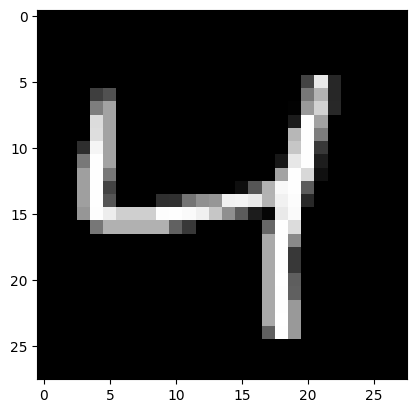

In [7]:
image, label = dataset[2]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 1


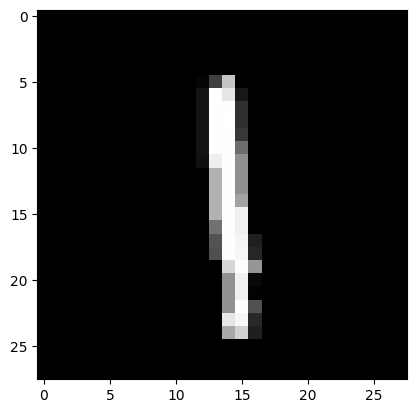

In [8]:
image, label = dataset[8]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
import torchvision.transforms as transforms

In [11]:
# MNIST dataset (images and labels), convert img to tensors
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [12]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [13]:
## check out some values inside the tensor
print(img_tensor[0, 10:15, 10:15])
print(torch.min(img_tensor), torch.max(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(0.) tensor(1.)


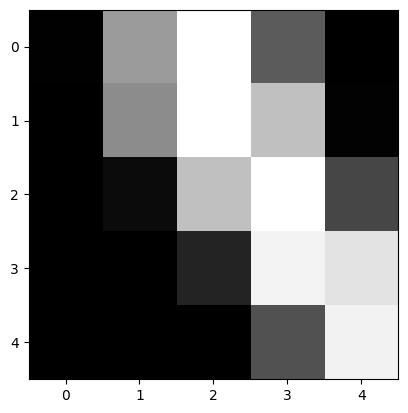

In [14]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

## Training and Validation Datasets

In [16]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)


(50000, 10000)

In [17]:
## create the dataloader to load data in batches
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## Model

In [18]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistics regression model
model = nn.Linear(input_size, num_classes)

In [21]:
print(model.weight.shape)
model.weight


torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0237,  0.0064, -0.0121,  ...,  0.0107,  0.0018, -0.0031],
        [ 0.0279,  0.0250, -0.0121,  ..., -0.0047, -0.0190, -0.0245],
        [-0.0166, -0.0326,  0.0251,  ...,  0.0273, -0.0205, -0.0030],
        ...,
        [-0.0287, -0.0278, -0.0222,  ..., -0.0055, -0.0177, -0.0102],
        [-0.0312, -0.0122,  0.0089,  ..., -0.0204,  0.0032,  0.0101],
        [-0.0348,  0.0029, -0.0209,  ...,  0.0225, -0.0027, -0.0019]],
       requires_grad=True)

In [22]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0172, -0.0108, -0.0216,  0.0140, -0.0049, -0.0270, -0.0278, -0.0159,
        -0.0204,  0.0306], requires_grad=True)

In [36]:
## Let's extend the nn.Module class from pytorch to define a custom model
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

model = MnistModel()

In [31]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [32]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0276, -0.0051, -0.0107,  ..., -0.0227, -0.0007,  0.0055],
         [ 0.0219, -0.0055,  0.0009,  ..., -0.0129, -0.0033,  0.0189],
         [ 0.0247, -0.0185,  0.0290,  ..., -0.0183, -0.0186, -0.0270],
         ...,
         [ 0.0104, -0.0228, -0.0217,  ..., -0.0170, -0.0064,  0.0042],
         [ 0.0343, -0.0069, -0.0155,  ...,  0.0261,  0.0268,  0.0137],
         [-0.0268, -0.0282,  0.0279,  ..., -0.0058,  0.0244,  0.0320]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0150,  0.0162, -0.0164, -0.0089, -0.0335,  0.0268, -0.0220,  0.0059,
          0.0314, -0.0070], requires_grad=True)]

In [35]:
## testing our new custom model
for images, labels in train_loader:
  outputs = model(images)
  break

print('outputs.shape : ', outputs.shape)

print('Sample outputs :\n' , outputs[:2].data)

NotImplementedError: Module [MnistModel] is missing the required "forward" function

In [37]:
## testing our new custom model
for images, labels in train_loader:
  outputs = model(images)
  break

print('outputs.shape : ', outputs.shape)

print('Sample outputs :\n' , outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1433, -0.0947,  0.1040, -0.0340,  0.0328,  0.0191,  0.0821, -0.0506,
         -0.0816, -0.1288],
        [ 0.0311,  0.2459,  0.0092, -0.1386,  0.2589, -0.0769, -0.0178,  0.0958,
         -0.1675, -0.0016]])


In [38]:
import torch.nn.functional as F

In [40]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)
# Add up the probabilities of an output row
print("Sum:", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1151, 0.0907, 0.1106, 0.0964, 0.1030, 0.1016, 0.1082, 0.0948, 0.0919,
         0.0877],
        [0.0998, 0.1237, 0.0976, 0.0842, 0.1253, 0.0896, 0.0950, 0.1064, 0.0818,
         0.0966]])
Sum: 1.0


In [41]:
## Determining the predicted label for each image using torch.max
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([0, 4, 6, 2, 7, 2, 5, 7, 7, 7, 7, 7, 7, 9, 7, 8, 7, 7, 2, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 2, 2, 7, 7, 0, 7, 6, 7, 7, 8, 7, 7, 7, 7, 2, 7, 7, 0,
        7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 7, 7, 8, 7, 2, 7, 7, 2, 7, 7, 5, 7,
        8, 7, 7, 2, 6, 7, 2, 2, 2, 9, 7, 2, 7, 8, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7,
        7, 8, 7, 7, 7, 6, 7, 2, 2, 6, 7, 7, 2, 5, 2, 2, 7, 2, 2, 7, 7, 2, 6, 2,
        7, 7, 2, 7, 5, 7, 9, 7])
tensor([0.1151, 0.1253, 0.1310, 0.1397, 0.1529, 0.1436, 0.1249, 0.1699, 0.1344,
        0.1374, 0.1332, 0.1481, 0.1402, 0.1231, 0.1317, 0.1173, 0.1406, 0.1276,
        0.1422, 0.1478, 0.1420, 0.1371, 0.1239, 0.1489, 0.1414, 0.1735, 0.1790,
        0.1150, 0.1727, 0.1428, 0.1362, 0.1267, 0.1886, 0.1513, 0.1160, 0.1285,
        0.1275, 0.1487, 0.1308, 0.1244, 0.1284, 0.1317, 0.1359, 0.1624, 0.1331,
        0.1657, 0.1632, 0.1240, 0.1710, 0.1413, 0.1484, 0.1292, 0.1550, 0.1734,
        0.1722, 0.1317, 0.1996, 0.1706, 0.1285, 0.1308, 0.1287, 0.1432, 0.1176,
       

## Evaluation Metric and Loss Function

In [73]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [74]:
accuracy(outputs, labels)

tensor(0.0547)

In [75]:
## Loss function using cross entropy
loss_fn = F.cross_entropy

In [76]:
## Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3662, grad_fn=<NllLossBackward0>)


## Training the Model

In [77]:
def fit (epochs, lr, model, train_loader, val_loader, opt_fn=torch.optim.SGD):
  optimizer = opt_fn(model.parameters(), lr)
  history = [] # fro recording epoch-wise results
  for epoch in range(epochs):
    # Training Phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    # Validation phase
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)
  return history

In [78]:
## Lets define the evaluate function, used in validation phase of fit
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [83]:
## define our custom model to include additional methods
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

  def training_step(self, batch):
    images, labels = batch
    out = self(images)  ## Generate Predictions
    loss = F.cross_entropy(out, labels)  ## Calculate loss
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)    ## Generate Prediction
    loss = F.cross_entropy(out, labels) ## Cal loss
    acc = accuracy(out, labels)  ## call accuracy
    return {'val_loss': loss.detach(), 'val_acc': acc}


  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()  ## Combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()  ## Combine accuracies
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [85]:
# Train the model
history1 = fit(4, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9712, val_acc: 0.5929
Epoch [1], val_loss: 1.6963, val_acc: 0.7231
Epoch [2], val_loss: 1.4916, val_acc: 0.7586
Epoch [3], val_loss: 1.3374, val_acc: 0.7778


In [86]:
# Train the model
history2 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 1.2190, val_acc: 0.7904
Epoch [1], val_loss: 1.1261, val_acc: 0.8020
Epoch [2], val_loss: 1.0516, val_acc: 0.8107
Epoch [3], val_loss: 0.9907, val_acc: 0.8169
Epoch [4], val_loss: 0.9400, val_acc: 0.8242


In [87]:
# Train the model
history3 = fit(10, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8972, val_acc: 0.8283
Epoch [1], val_loss: 0.8606, val_acc: 0.8326
Epoch [2], val_loss: 0.8289, val_acc: 0.8353
Epoch [3], val_loss: 0.8011, val_acc: 0.8385
Epoch [4], val_loss: 0.7766, val_acc: 0.8423
Epoch [5], val_loss: 0.7548, val_acc: 0.8440
Epoch [6], val_loss: 0.7352, val_acc: 0.8467
Epoch [7], val_loss: 0.7176, val_acc: 0.8487
Epoch [8], val_loss: 0.7016, val_acc: 0.8505
Epoch [9], val_loss: 0.6870, val_acc: 0.8520


## Testing with individual images

In [89]:
# Define test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


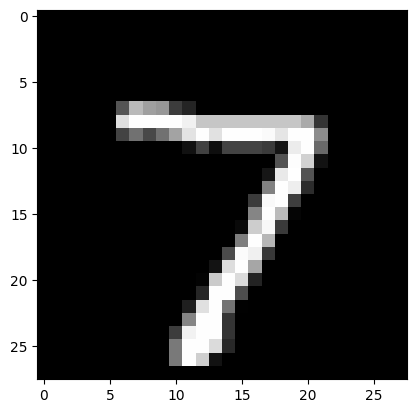

In [90]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [91]:
## Define Helper function
def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

Label: 7 , Predicted: 7


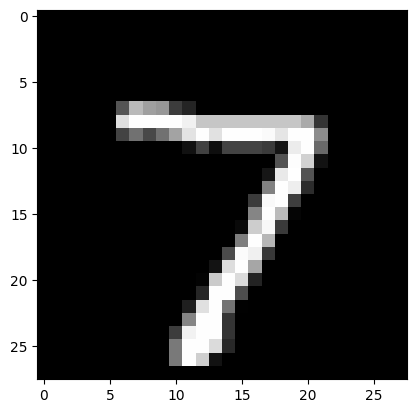

In [92]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))



Label: 2 , Predicted: 2


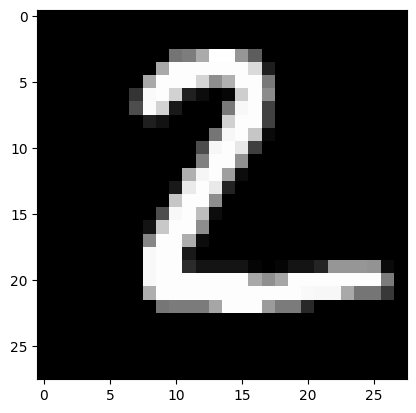

In [93]:
img, label = test_dataset[1]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))



Label: 4 , Predicted: 4


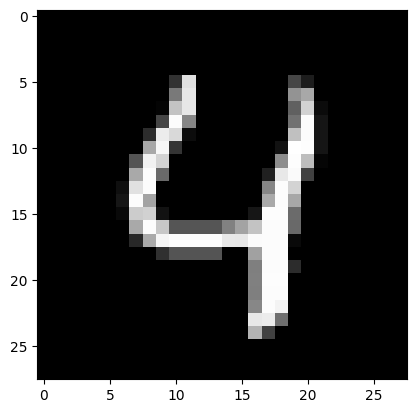

In [94]:
img, label = test_dataset[4]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))



Label: 0 , Predicted: 0


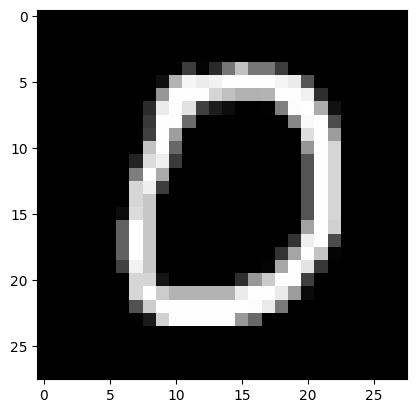

In [95]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))



Label: 3 , Predicted: 3


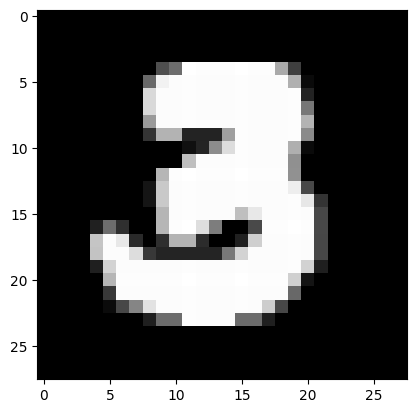

In [96]:
img, label = test_dataset[200]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))



Label: 9 , Predicted: 3


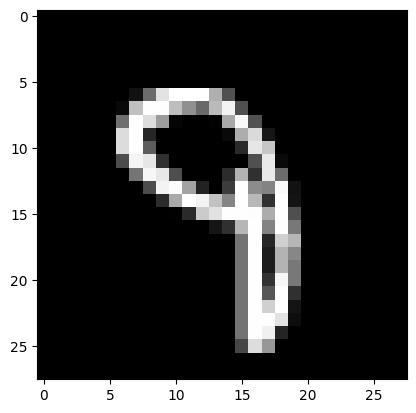

In [97]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))



In [98]:
## Check overall loss and accuracy
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result


{'val_loss': 0.657707929611206, 'val_acc': 0.8583984375}

## Saving and Loading the Model

In [99]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [100]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0312,  0.0154,  0.0040,  ..., -0.0273, -0.0327, -0.0070],
                      [-0.0010, -0.0319, -0.0314,  ..., -0.0261,  0.0316,  0.0147],
                      [ 0.0056, -0.0007, -0.0265,  ..., -0.0356,  0.0113,  0.0083],
                      ...,
                      [-0.0259,  0.0235,  0.0193,  ..., -0.0327,  0.0150, -0.0230],
                      [-0.0339, -0.0045,  0.0086,  ...,  0.0038, -0.0018, -0.0288],
                      [ 0.0168,  0.0012,  0.0284,  ...,  0.0297, -0.0295, -0.0295]])),
             ('linear.bias',
              tensor([-0.0377,  0.1207, -0.0238, -0.0217,  0.0477,  0.0162, -0.0246,  0.0643,
                      -0.0816,  0.0026]))])

In [101]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()


OrderedDict([('linear.weight',
              tensor([[ 0.0312,  0.0154,  0.0040,  ..., -0.0273, -0.0327, -0.0070],
                      [-0.0010, -0.0319, -0.0314,  ..., -0.0261,  0.0316,  0.0147],
                      [ 0.0056, -0.0007, -0.0265,  ..., -0.0356,  0.0113,  0.0083],
                      ...,
                      [-0.0259,  0.0235,  0.0193,  ..., -0.0327,  0.0150, -0.0230],
                      [-0.0339, -0.0045,  0.0086,  ...,  0.0038, -0.0018, -0.0288],
                      [ 0.0168,  0.0012,  0.0284,  ...,  0.0297, -0.0295, -0.0295]])),
             ('linear.bias',
              tensor([-0.0377,  0.1207, -0.0238, -0.0217,  0.0477,  0.0162, -0.0246,  0.0643,
                      -0.0816,  0.0026]))])

In [102]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.657707929611206, 'val_acc': 0.8583984375}